## Supervised and unsupervised learning

Zilin Chen on 7/28/2022

The MNIST database is a large database of handwritten digits that is commonly used for training image processing system. This project uses MNIST database as an example of performing both unsupervised and supervised learning on this single dataset. 

### PCA on noise filtering

In [2]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns; 
import time

import warnings
warnings.filterwarnings("ignore")

In [7]:
###Plot the digits
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

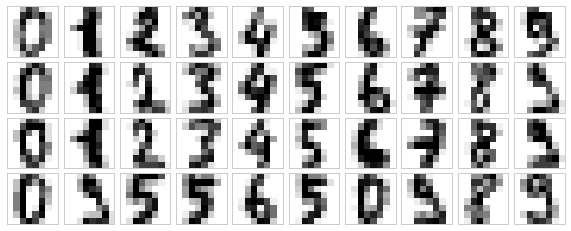

In [9]:
digits = load_digits()
plot_digits(digits.data)

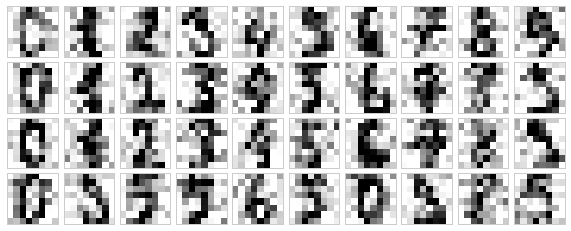

In [14]:
#create noise
np.random.seed(42)
noise = np.random.normal(digits.data, 4)
plot_digits(noise)

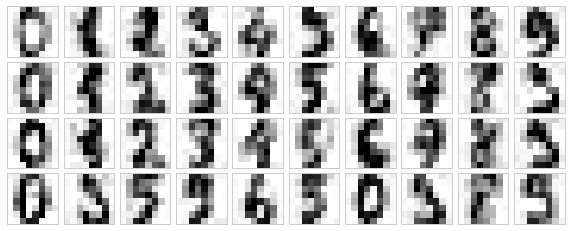

In [21]:
compo = PCA(0.6).fit_transform(noise)
filter_digits = pca.inverse_transform(compo)
plot_digits(filter_digits)

### With a larger dataset

In [22]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [24]:
X.shape

(70000, 784)

In [25]:
y.shape

(70000,)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
                              X, y, test_size=0.2, random_state=0)

In [45]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
benchmark_cols = ['Variance retained','n_Components','Time(s)','Accuracy_percentage']
benchmark = pd.DataFrame(columns = benchmark_cols)

#### Try various variance for pca deduction

In [54]:
var_list = [0.95, 0.90, 0.85, 0.80, 0.75]

In [48]:
def benchmark_pca(variance, train_data, test_data, train_label, test_label):
    global benchmark
    
    #pca transform
    pca = PCA(variance)
    pca.fit(train_data)
    n_components = pca.n_components_
    pca_train = pca.transform(train_data)
    pca_test = pca.transform(test_data)
    
    #fit logistic regression
    logReg = LogisticRegression()
    start = time.time()
    logReg.fit(pca_train, train_label)
    end = time.time()
    diff = end - start
    
    #predict result
    test_pred = logReg.predict(pca_test)
    accuracy = metrics.accuracy_score(test_label, test_pred)
    
    #write benchmark
    text = dict(zip(benchmark_cols, [variance, n_components, diff, accuracy]))
    benchmark = benchmark.append(text, ignore_index=True)
    
    

In [49]:
for variance in var_list:
    benchmark_pca(variance, X_train, X_test, y_train, y_test)

In [50]:
benchmark

,Variance retained,n_Components,Time(s),Accuracy_percentage
0,0.95,327.0,3.958494,0.918714
1,0.90,233.0,3.168160,0.917786
2,0.85,182.0,3.046907,0.917643
3,0.80,146.0,2.832161,0.917714
4,0.75,118.0,2.725071,0.915357


Text(0.5, 1.0, 'variance vs accuracy')

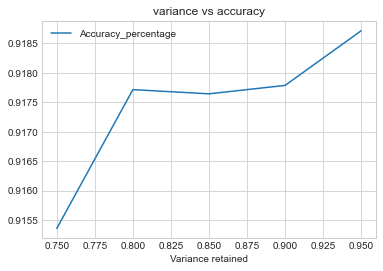

In [51]:
benchmark.plot(x=0,y=-1)
plt.title("variance vs accuracy")

Text(0.5, 1.0, 'time vs accuracy')

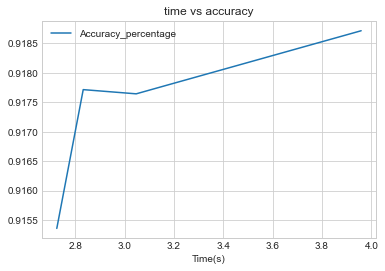

In [52]:
benchmark.plot(x=2,y=-1)
plt.title("time vs accuracy")

Text(0.5, 1.0, 'No. components vs accuracy')

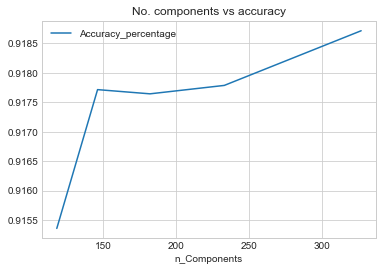

In [53]:
benchmark.plot(x=1, y=-1)
plt.title("No. components vs accuracy")